In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [597]:
df_bio = pd.read_csv('biometric.csv')

## Aadhaar Lifecycle Risk Index

In [598]:
df_bio.head()

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


In [599]:
df_bio.head()

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


## EDA

##### Reusable Functions

In [600]:
def histogram(df,col1,col2,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.countplot(data=df , x =df[col1] , hue=df[col2])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()


def barplot(df,col1,col2,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.barplot(data = df , x = col1 , y=col2)
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()


def scatterplot(df,col1,col2,xlabel , ylabel):
     plt.figure(figsize=(15,8))
     sns.scatterplot(data = df , x = col1 , y=col2)
     plt.xlabel(f"{xlabel}")
     plt.ylabel(f"{ylabel}")
     plt.xticks(rotation = 45)
     plt.show()
     plt.tight_layout()

def boxplot(df,col,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.boxplot(data=df , x =df[col])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()

def heatmap(df):
    plt.figure(figsize=(15,10))
    sns.set_style("darkgrid")
    sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm')
    plt.show()
    plt.tight_layout()

def kde(df,col1,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.kdeplot(data=df , x =df[col1])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()

def histplot(df,col1,col2,xlabel , ylabel):
    plt.figure(figsize=(15,15))
    sns.set_style('darkgrid')
    sns.histplot(data=df , x =df[col1] , y=df[col2] , kde=True , palette="Set-2")
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()

In [601]:
df_bio.head()   

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


In [602]:
df_copy = df_bio.copy()

In [603]:
df_copy['total_biometric_age'] = df_copy['bio_age_5_17'] + df_copy['bio_age_17_']


## Which states generate the highest total biometric authentication demand?

### Gujarat , Maharastra , Madhya Pradesh , Bihar , Uttar Pradesh , Tamil Nadu , Rajasthan , Andhra Pradesh , Karnataka , West Bengal Generate the Most Demand and 
### Puducherry , sikkim , Daman and Diu and Dadra and Nagar Haveli , Andaman and Nicobar Islands , Lakshadweep , Ladakh , Jammu Kashmir , Chandigarh , Arunachal pradesh , Goa Generate Least Demand


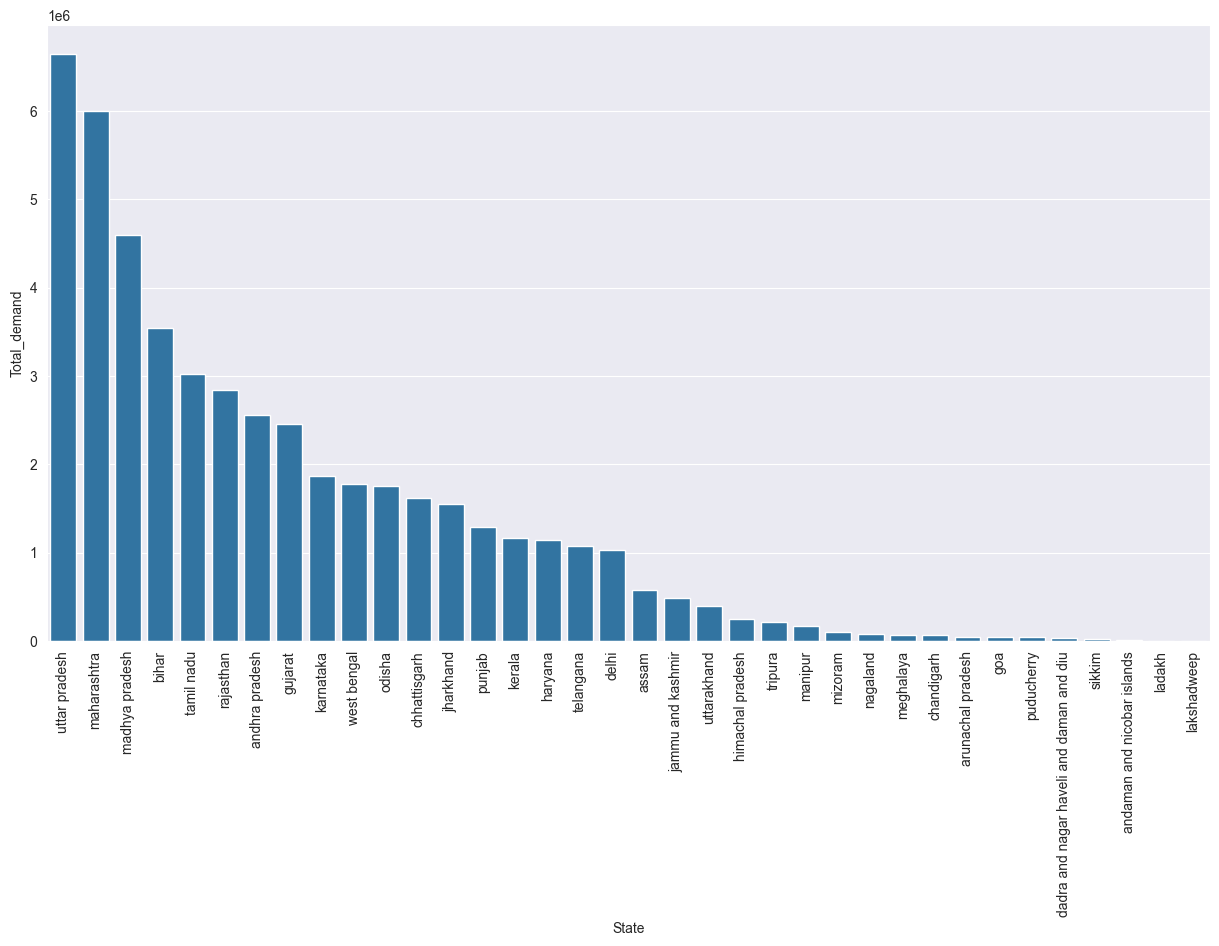

<Figure size 640x480 with 0 Axes>

In [604]:
df_total_bio_demand = df_copy.groupby('state')['total_biometric_age'].sum().sort_values(ascending=False).reset_index()
barplot(df_total_bio_demand , 'state' , 'total_biometric_age' , 'State' , 'Total_demand')

C:\Users\Yash0607\AppData\Local\Temp\ipykernel_5628\4165783143.py:61: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df , x =df[col1] , y=df[col2] , kde=True , palette="Set-2")


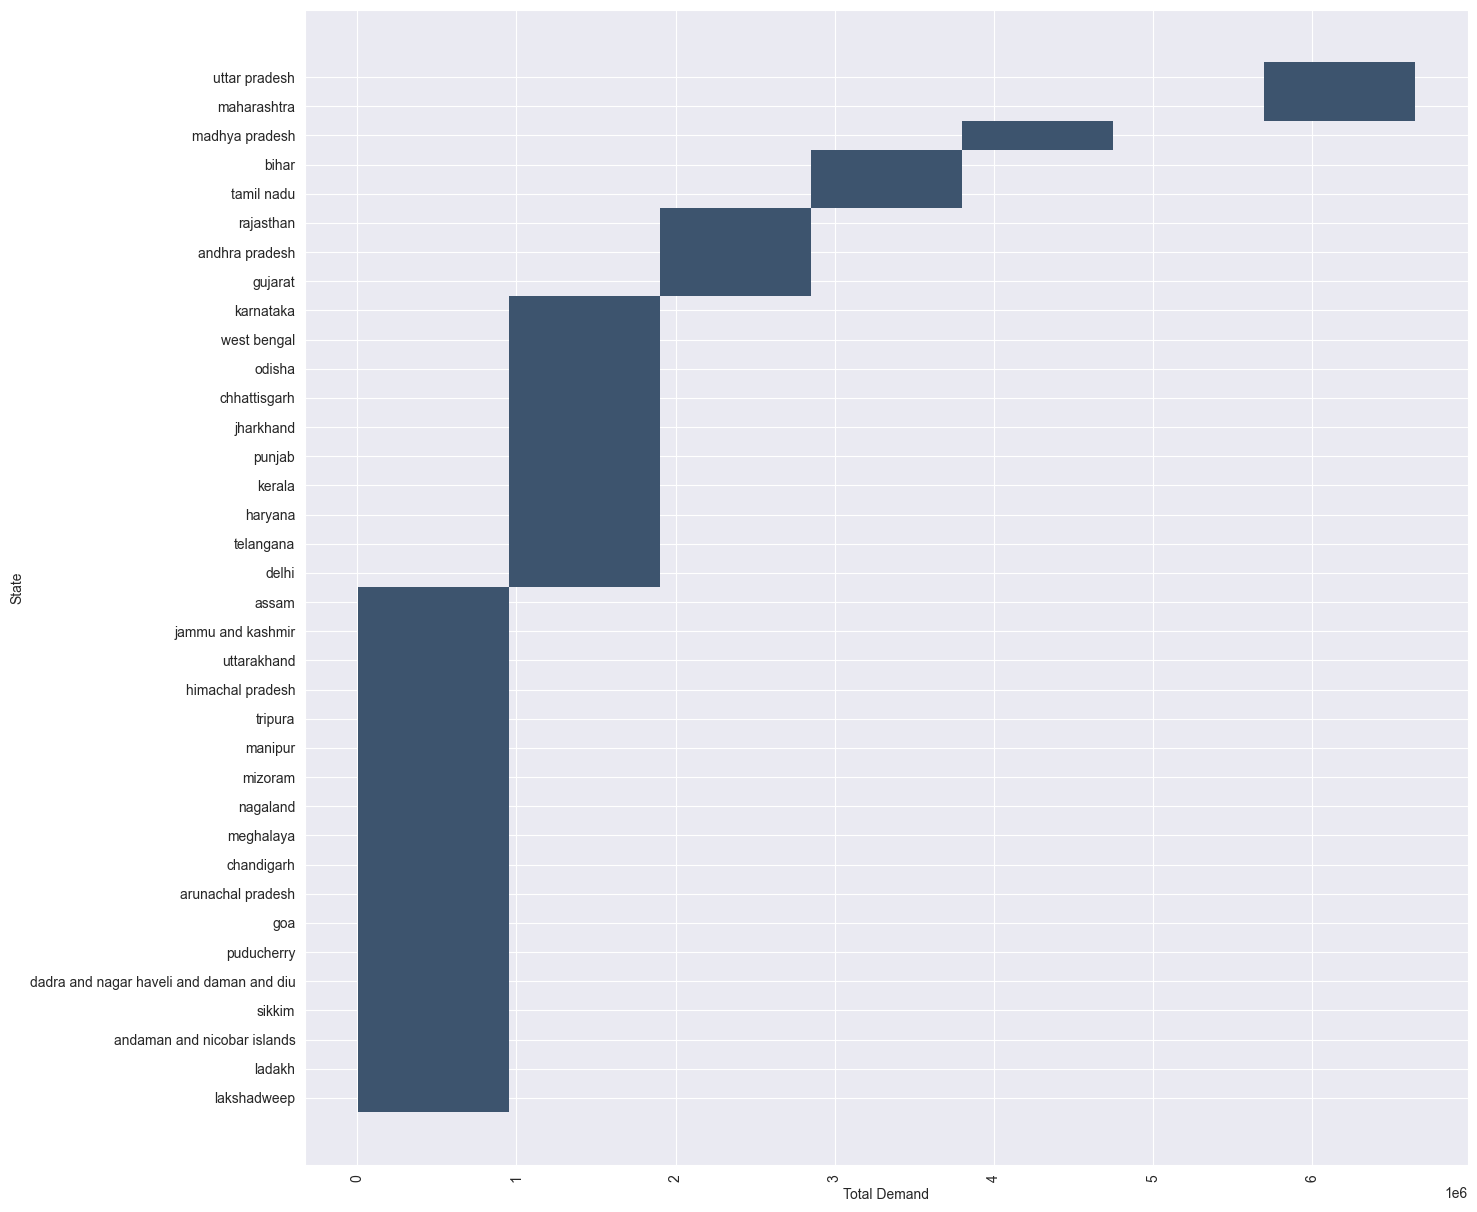

<Figure size 640x480 with 0 Axes>

In [605]:
histplot(df_total_bio_demand , "total_biometric_age" , "state" , "Total Demand" , "State")

In [606]:
df_total_bio_demand

,state,total_biometric_age
0,uttar pradesh,6643629
1,maharashtra,6002738
2,madhya pradesh,4601265
3,bihar,3543433
4,tamil nadu,3026489
5,rajasthan,2844034
6,andhra pradesh,2557511
7,gujarat,2455187
8,karnataka,1872811
9,west bengal,1776838


In [607]:
df_total_bio_demand.head(10)

,state,total_biometric_age
0,uttar pradesh,6643629
1,maharashtra,6002738
2,madhya pradesh,4601265
3,bihar,3543433
4,tamil nadu,3026489
5,rajasthan,2844034
6,andhra pradesh,2557511
7,gujarat,2455187
8,karnataka,1872811
9,west bengal,1776838


In [608]:
df_total_bio_demand.tail(10)

,state,total_biometric_age
26,meghalaya,66717
27,chandigarh,62765
28,arunachal pradesh,46607
29,goa,46230
30,puducherry,44628
31,dadra and nagar haveli and daman and diu,30293
32,sikkim,18306
33,andaman and nicobar islands,14611
34,ladakh,4140
35,lakshadweep,3313


### Which districts show consistently low Aadhaar enrollment for children (0–17)?

In [609]:
df_enrollment = pd.read_csv('enrollment.csv')
df_enrollment.head()

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day
0,meghalaya,east khasi hills,793121,11,61,37,2025,3,2
1,karnataka,bengaluru urban,560043,14,33,39,2025,3,9
2,uttar pradesh,kanpur nagar,208001,29,82,12,2025,3,9
3,uttar pradesh,aligarh,202133,62,29,15,2025,3,9
4,karnataka,bengaluru urban,560016,14,16,21,2025,3,9


In [610]:
df_enrollment_copy = df_enrollment.copy()

In [611]:
df_enrollment_copy['total_minor_age'] = df_enrollment_copy['age_0_5'] + df_enrollment_copy['age_5_17']
df_enrollment_copy.drop(columns=['age_0_5' , 'age_5_17' , 'age_18_greater'],axis=1 , inplace=True)
df_enrollment_copy.head()

,state,district,pincode,year,month,day,total_minor_age
0,meghalaya,east khasi hills,793121,2025,3,2,72
1,karnataka,bengaluru urban,560043,2025,3,9,47
2,uttar pradesh,kanpur nagar,208001,2025,3,9,111
3,uttar pradesh,aligarh,202133,2025,3,9,91
4,karnataka,bengaluru urban,560016,2025,3,9,30


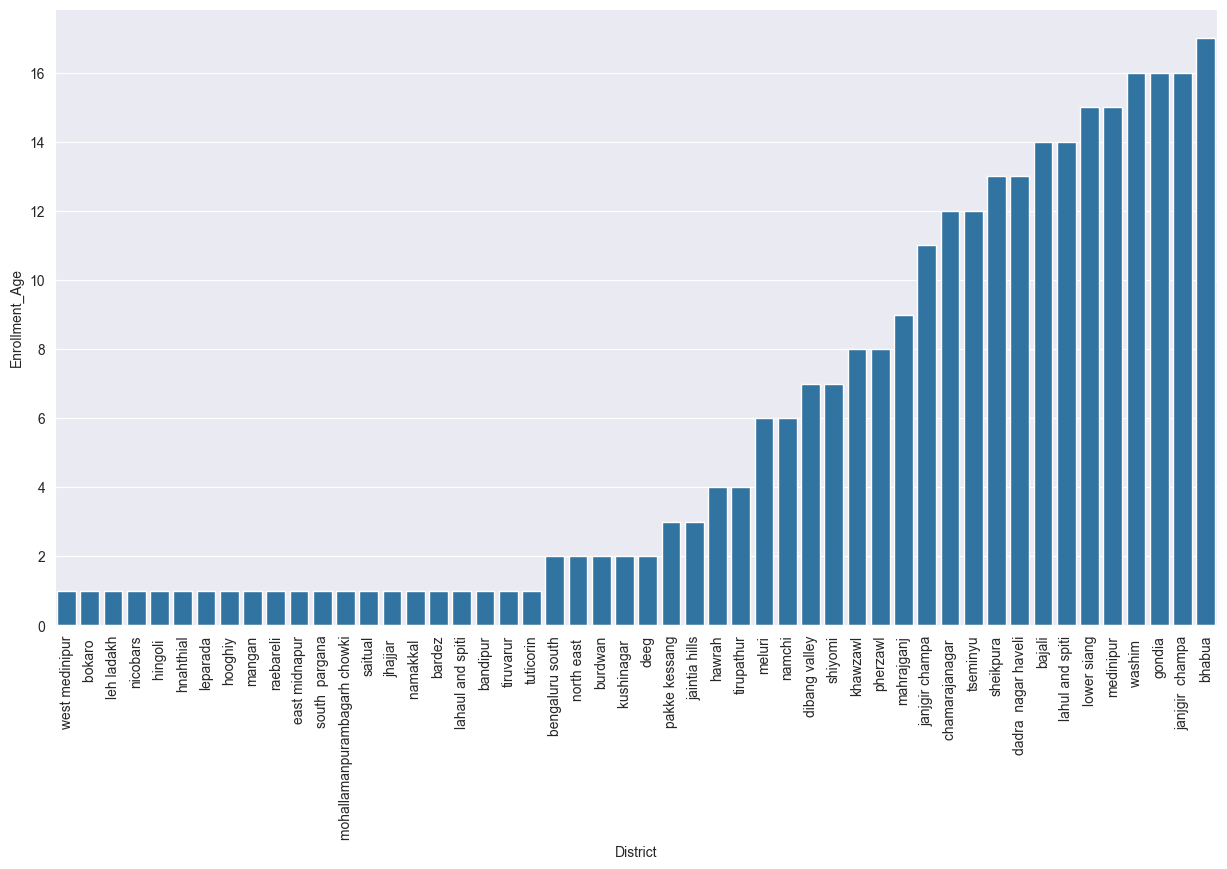

<Figure size 640x480 with 0 Axes>

In [612]:
df_low_enroll_minors = df_enrollment_copy.groupby('district')['total_minor_age'].sum().sort_values(ascending=True).reset_index()
barplot(df_low_enroll_minors.head(50) , "district" ,"total_minor_age","District","Enrollment_Age")

### bardez , lahul and spiti , leprada , south pargana , bokaro , leh ladakh , jhajjar , mangan , raebareily , nicobars , tuticorin and many more are the districts having low enrollment of children 

### uttar dinjapur , east khasi hills , bengaluru , gaya , hardoi , jaipur , bareily , hyderabad , bengaluru urban are among the districts wth high enrollment of children

In [613]:
df_low_enroll_minors.head(30)

,district,total_minor_age
0,west medinipur,1
1,bokaro,1
2,leh ladakh,1
3,nicobars,1
4,hingoli,1
5,hnahthial,1
6,leparada,1
7,hooghiy,1
8,mangan,1
9,raebareli,1


In [614]:
df_low_enroll_minors.tail(20)

,district,total_minor_age
928,uttar dinajpur,17277
929,east khasi hills,17548
930,bengaluru,17673
931,gaya,17689
932,hardoi,17818
933,jaipur,17930
934,east champaran,18161
935,bareilly,18632
936,shahjahanpur,18953
937,hyderabad,18966


## Input Features :
1) Coverage Risk
2) Data Instability Risk
3) Biometric Compliance Risk

## Target Feature : ALRI 

In [615]:
df_bio = pd.read_csv('biometric.csv')
df_enroll = pd.read_csv('enrollment.csv')
df_demographic = pd.read_csv('demographic.csv')

In [616]:
df_enroll['total_enrollment'] = df_enroll['age_0_5'] + df_enroll['age_5_17'] + df_enroll['age_18_greater']

In [617]:
df_enroll.sample(5)

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day,total_enrollment
337076,maharashtra,raigarh,410210,1,1,0,2025,9,26,2
84412,punjab,sri muktsar sahib,151212,1,0,0,2025,9,6,1
232921,madhya pradesh,mandsaur,458888,5,2,0,2025,9,17,7
388434,west bengal,purba medinipur,721650,3,0,0,2025,10,15,3
176430,maharashtra,ahmadnagar,413716,0,1,0,2025,9,13,1


### Child-Enrollment-ratio : Child Enrolment Ratio tells us what fraction of new Aadhaar enrolments are children (0–17 years) in a given region and month.

In [618]:
df_enroll['child_enroll_ratio']= (df_enroll['age_0_5'] + df_enroll['age_5_17']) / (df_enroll['total_enrollment']+1)
## +1 for not cases where it is dividing by 0.

In [619]:
df_enroll.sample(5)

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day,total_enrollment,child_enroll_ratio
290493,odisha,bhadrak,756117,1,0,0,2025,9,22,1,0.50
206278,jharkhand,bokaro,827014,2,1,0,2025,9,16,3,0.75
287126,goa,south goa,403802,1,0,0,2025,9,22,1,0.50
225051,bihar,banka,813118,1,0,0,2025,9,17,1,0.50
131557,gujarat,ahmadabad,382481,1,0,0,2025,9,10,1,0.50


### Coverage Risk measures the risk that people — especially children — are missing Aadhaar enrolment in a region.

In [620]:
df_enroll['coverage_risk'] = 1-df_enroll['child_enroll_ratio']

In [621]:
df_enroll.sample(5)

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day,total_enrollment,child_enroll_ratio,coverage_risk
458578,assam,hailakandi,788161,0,0,21,2025,10,23,21,0.000000,1.000000
31913,andhra pradesh,east godavari,533430,2,0,0,2025,9,2,2,0.666667,0.333333
90852,assam,karbi anglong,782480,1,0,0,2025,9,7,1,0.500000,0.500000
176701,uttar pradesh,ballia,277213,2,2,0,2025,9,13,4,0.800000,0.200000
131129,andhra pradesh,nizamabad,503175,1,0,0,2025,9,10,1,0.500000,0.500000


### Data Instability Risk measures how unstable Aadhaar demographic data is in a region over time.

In [622]:
df_demographic.sample(5)

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day
111038,tamil nadu,tiruchirappalli,620005,0,7,2025,10,18
226138,uttar pradesh,etah,207125,0,14,2025,12,15
15464,gujarat,narmada,393145,13,12,2025,9,4
208013,west bengal,hooghly,712614,0,15,2025,12,11
81412,telangana,medak,502300,1,1,2025,9,17


In [623]:
df_demographic['demo_total'] = df_demographic['demo_age_5_17'] + df_demographic['demo_age_17_']
df_demographic.sample(5)

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day,demo_total
23965,bihar,saran,841410,1,27,2025,9,5,28
359883,west bengal,south parganas,700139,0,10,2025,9,4,10
140261,gujarat,devbhumi dwarka,361315,2,4,2025,11,18,6
354380,bihar,muzaffarpur,842002,6,69,2025,9,5,75
402614,tamil nadu,vellore,632113,2,4,2025,9,15,6


### Rolling volatility measures how much a value fluctuates over a short, moving time window.

In [624]:
df_demographic['demo_volatility'] = (
    df_demographic.groupby(['state','district','pincode'])['demo_total']
      .rolling(3) 
      .std()      # rolling formulae involves std
      .reset_index(drop=True , level=[0,1,2]) # for only row_id
)
df_demographic.sample(10)

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day,demo_total,demo_volatility
359653,west bengal,hooghly,712139,0,9,2025,9,4,9,1.527525
120773,karnataka,davangere,577513,1,3,2025,11,14,4,1.732051
410305,punjab,sri muktsar sahib,151211,0,9,2025,9,17,9,2.516611
306224,kerala,ernakulam,686670,0,5,2025,12,21,5,2.081666
352112,kerala,malappuram,679328,1,6,2025,9,3,7,202.968799
182372,odisha,khorda,751013,2,7,2025,12,6,9,4.000000
376602,karnataka,shivamogga,577243,0,5,2025,9,10,5,1.527525
159170,maharashtra,nashik,422207,2,3,2025,10,30,5,1.154701
96445,uttar pradesh,aligarh,202135,6,14,2025,9,20,20,4.358899
416760,karnataka,bangalore,560099,1,7,2025,9,19,8,2.081666


In [625]:
pd.DataFrame(df_demographic.groupby(['state','district','pincode'])['demo_total'].rolling(3).std())

demo_total
state                       district       pincode                   
andaman and nicobar islands andamans       744101  51259          NaN
                                                   82291          NaN
                                                   171122    1.527525
                                                   197558    2.000000
                                                   254773    3.605551
...                                                               ...
west bengal                 west midnapore 721517  319546    5.507571
                                                   383046    7.023769
                                                   384539    7.094599
                                           721641  149644         NaN
                                                   202047         NaN

[418705 rows x 1 columns]

In [626]:
df_demographic.isnull().sum() # null values are present , so we will do imputation and fill the values with 0

state                  0
district               0
pincode                0
demo_age_5_17          0
demo_age_17_           0
year                   0
month                  0
day                    0
demo_total             0
demo_volatility    56227
dtype: int64

In [627]:
df_demographic['demo_volatility'] = df_demographic['demo_volatility'].fillna(0)
upper_cap = df_demographic['demo_volatility'].quantile(0.99)
df_demographic['demo_volatility'] = df_demographic['demo_volatility'].clip(upper=upper_cap)

In [628]:
df_demographic.isnull().sum() # no null 

state              0
district           0
pincode            0
demo_age_5_17      0
demo_age_17_       0
year               0
month              0
day                0
demo_total         0
demo_volatility    0
dtype: int64

In [629]:
df_demographic.sample(5)

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day,demo_total,demo_volatility
323818,tamil nadu,nagapattinam,611108,0,6,2025,12,27,6,3.055050
153329,himachal pradesh,chamba,176207,0,4,2025,10,29,4,2.081666
81914,uttarakhand,dehradun,248142,3,23,2025,9,17,26,7.211103
212586,chhattisgarh,raipur,493113,0,2,2025,11,10,2,4.041452
211160,uttar pradesh,meerut,250110,0,10,2025,11,9,10,7.000000


### 

### Biometric Compliance Risk measures the risk that people—especially children—will face Aadhaar authentication failures in the future because mandatory biometric updates are not happening properly.

In [630]:
df_bio.sample(5)

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
115877,madhya pradesh,dhar,454773,3,2,2025,9,1
459988,tamil nadu,salem,636009,9,8,2025,9,18
447959,telangana,nizamabad,503230,9,8,2025,9,18
123882,jharkhand,palamu,822101,8,6,2025,9,1
464436,odisha,sambalpur,768033,1,0,2025,9,18


In [631]:
df_bio['bio_child_total'] = df_bio['bio_age_5_17']  + df_bio['bio_age_17_']
df_bio['bio_child_ratio'] = (df_bio['bio_age_5_17'] )/ (df_bio['bio_child_total']+1)
# df_bio.sample(5)

In [632]:
df_bio['bio_compliance_risk'] = 1-df_bio['bio_child_ratio']
# df_bio.sample(5)

In [633]:
df_bio.isnull().sum() # no nan values

state                  0
district               0
pincode                0
bio_age_5_17           0
bio_age_17_            0
year                   0
month                  0
day                    0
bio_child_total        0
bio_child_ratio        0
bio_compliance_risk    0
dtype: int64

In [634]:
df_bio.sample(5)

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day,bio_child_total,bio_child_ratio,bio_compliance_risk
22771,kerala,ernakulam,686672,26,29,2025,4,1,55,0.464286,0.535714
233577,chhattisgarh,baloda bazar,493196,0,1,2025,9,7,1,0.000000,1.000000
90583,uttar pradesh,lucknow,226024,194,182,2025,7,1,376,0.514589,0.485411
217668,assam,majuli,785106,2,0,2025,9,6,2,0.666667,0.333333
95079,gujarat,bharuch,392165,44,72,2025,7,1,116,0.376068,0.623932


In [635]:
df_demographic.sample(5)

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day,demo_total,demo_volatility
111487,uttar pradesh,amethi,229124,2,7,2025,10,18,9,4.932883
382610,andhra pradesh,guntur,522308,0,2,2025,9,11,2,2.081666
264941,andhra pradesh,east godavari,533234,2,9,2025,11,8,11,4.509250
348971,maharashtra,amravati,444906,3,12,2025,9,4,15,2.645751
146557,gujarat,kachchh,370150,0,7,2025,11,19,7,1.000000


In [636]:
df_enroll.sample(5)

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day,total_enrollment,child_enroll_ratio,coverage_risk
75532,assam,kamrup metro,781171,2,2,0,2025,9,6,4,0.800000,0.200000
78728,karnataka,chitradurga,577557,2,0,0,2025,9,6,2,0.666667,0.333333
13815,andhra pradesh,prakasam,523002,1,1,0,2025,9,1,2,0.666667,0.333333
16921,maharashtra,amravati,444904,1,1,0,2025,9,1,2,0.666667,0.333333
290,assam,hailakandi,788155,70,43,18,2025,4,1,131,0.856061,0.143939


### Inner Join data on Common Columns

In [637]:
df_risk = (
    df_enroll[
        ['state','district','pincode','year','month','day','coverage_risk']
    ]
    .merge(
        df_demographic[
            ['state','district','pincode','year','month','day','demo_volatility']
        ],
        on=['state','district','pincode','year','month','day'],
        how='inner'
    )
    .merge(
        df_bio[
            ['state','district','pincode','year','month','day','bio_compliance_risk']
        ],
        on=['state','district','pincode','year','month','day'],
        how='inner'
    )
)

In [638]:
df_risk

,state,district,pincode,year,month,day,coverage_risk,demo_volatility,bio_compliance_risk
0,haryana,gurgaon,122002,2025,4,1,0.115385,477.192582,0.529412
1,rajasthan,jaipur,302012,2025,4,1,0.021978,477.192582,0.669484
2,uttar pradesh,baghpat,250611,2025,4,1,0.034296,477.192582,0.320450
3,gujarat,rajkot,360002,2025,4,1,0.113402,477.192582,0.498050
4,maharashtra,nandurbar,425412,2025,4,1,0.038869,477.192582,0.673626
...,...,...,...,...,...,...,...,...,...
95876,jharkhand,seraikelakharsawan,831013,2025,9,19,0.250000,4.041452,1.000000
95877,jharkhand,seraikelakharsawan,833220,2025,9,19,0.500000,14.742230,0.695652
95878,karnataka,yadgir,585214,2025,9,19,0.250000,1.527525,0.800000
95879,karnataka,yadgir,585220,2025,9,19,0.500000,1.154701,1.000000


In [639]:
df_risk.drop(columns=['state','district','year','month' , 'day' , 'pincode'],axis=1,inplace=True)

In [640]:
# df_risk = df_risk.to_csv('final_df.csv', index=False)

In [641]:
df_risk.sample(10)

,coverage_risk,demo_volatility,bio_compliance_risk
37574,0.500000,8.962886,0.333333
39599,0.500000,3.000000,1.000000
15783,0.500000,0.000000,1.000000
75371,0.500000,7.000000,0.785714
85034,0.500000,0.000000,0.750000
4435,0.038462,0.000000,0.558140
8452,0.066667,21.126603,0.551724
54355,0.250000,5.686241,0.516129
52902,0.500000,3.785939,0.375000
7110,0.250000,10.692677,0.540230


In [642]:
# normalize demo_volatility
v  = df_risk['demo_volatility']
df_risk['demo_volatility'] = ((v-v.min())/(v.max()-v.min())) # min-max normalized

In [643]:
# df_risk['demo_volatility'].isnull().sum() # no nans and nulls

In [644]:
# df_risk.sample(10)

In [645]:
# df_risk.describe()

### Target Feature : ALRI
ALRI = weighted combination of multiple risk signals
| Risk                      | What it captures                 |
| ------------------------- | -------------------------------- |
| Coverage_Risk             | People missing Aadhaar           |
| Data_Instability_Risk     | Aadhaar data becoming unreliable |
| Biometric_Compliance_Risk | Future authentication failures   |


In [646]:
df_risk['ALRI'] = (
    0.30*df_risk['coverage_risk'] +
    0.40*df_risk['demo_volatility'] +
    0.30*df_risk['bio_compliance_risk']
)

In [647]:
df_risk

,coverage_risk,demo_volatility,bio_compliance_risk,ALRI
0,0.115385,1.000000,0.529412,0.593439
1,0.021978,1.000000,0.669484,0.607438
2,0.034296,1.000000,0.320450,0.506424
3,0.113402,1.000000,0.498050,0.583436
4,0.038869,1.000000,0.673626,0.613749
...,...,...,...,...
95876,0.250000,0.008469,1.000000,0.378388
95877,0.500000,0.030894,0.695652,0.371053
95878,0.250000,0.003201,0.800000,0.316280
95879,0.500000,0.002420,1.000000,0.450968


In [648]:
df_risk.to_csv('alri.csv' ,index=False)